In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
coursera = pd.read_csv("D:/Documents/Downloads/Project5/Usecase-8-Project-5/Usecase-8-Project-5/DATA/Coursera.csv") 

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [38]:
pd.set_option('display.max_columns', None)
coursera.head()

,Subject,Title,Institution,Learning Product,Level,Duration,Gained Skills,Rate,Reviews
0,Business,Business Analysis & Process Management,Coursera Project Network,Guided Project,Beginner,Less Than 2 Hours,"Process Analysis, Business Process, Business A...",4.4,6100
1,Business,Getting Started with Microsoft Excel,Coursera Project Network,Guided Project,Intermediate,Less Than 2 Hours,"Microsoft Excel, Excel Formulas, Spreadsheet S...",4.6,11000
2,Business,Financial Markets,Yale University,Course,Beginner,1 - 3 Months,"Investment Banking, Risk Management, Financial...",4.8,30000
3,Business,Investment Risk Management,Coursera Project Network,Guided Project,Intermediate,Less Than 2 Hours,"Investment Management, Risk Management, Financ...",4.4,1800
4,Business,Food & Beverage Management,Università Bocconi,Course,Mixed,1 - 3 Months,"Food and Beverage, Hospitality, Restaurant Man...",4.8,4800


In [39]:
coursera.shape

(3404, 9)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [40]:
coursera.head()

,Subject,Title,Institution,Learning Product,Level,Duration,Gained Skills,Rate,Reviews
0,Business,Business Analysis & Process Management,Coursera Project Network,Guided Project,Beginner,Less Than 2 Hours,"Process Analysis, Business Process, Business A...",4.4,6100
1,Business,Getting Started with Microsoft Excel,Coursera Project Network,Guided Project,Intermediate,Less Than 2 Hours,"Microsoft Excel, Excel Formulas, Spreadsheet S...",4.6,11000
2,Business,Financial Markets,Yale University,Course,Beginner,1 - 3 Months,"Investment Banking, Risk Management, Financial...",4.8,30000
3,Business,Investment Risk Management,Coursera Project Network,Guided Project,Intermediate,Less Than 2 Hours,"Investment Management, Risk Management, Financ...",4.4,1800
4,Business,Food & Beverage Management,Università Bocconi,Course,Mixed,1 - 3 Months,"Food and Beverage, Hospitality, Restaurant Man...",4.8,4800


In [41]:
coursera.columns

Index(['Subject', 'Title', 'Institution', 'Learning Product', 'Level',
       'Duration', 'Gained Skills', 'Rate', 'Reviews'],
      dtype='object')

In [42]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3404 entries, 0 to 3403
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Subject           3404 non-null   object 
 1   Title             3404 non-null   object 
 2   Institution       3404 non-null   object 
 3   Learning Product  3404 non-null   object 
 4   Level             3404 non-null   object 
 5   Duration          3404 non-null   object 
 6   Gained Skills     3404 non-null   object 
 7   Rate              3404 non-null   float64
 8   Reviews           3404 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 239.5+ KB


In [43]:
coursera.describe(include="object")

,Subject,Title,Institution,Learning Product,Level,Duration,Gained Skills
count,3404,3404,3404,3404,3404,3404,3404
unique,4,2753,208,5,4,4,2762
top,Business,Business Analytics,IBM,Course,Beginner,1 - 4 Weeks,"Data Storytelling, Feature Engineering, Superv..."
freq,973,6,251,2553,1741,1415,2


In [44]:
coursera.describe(include="number")

,Rate,Reviews
count,3404.000000,3404.000000
mean,4.560076,3282.244712
std,0.316573,13121.984564
min,1.900000,6.000000
25%,4.500000,61.000000
50%,4.600000,322.000000
75%,4.700000,1600.000000
max,5.000000,277000.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [45]:
# This dataset was generated by scraping data from Transfermarkt and it is from Kaggle Football Dataset (https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset?resource=download)

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [46]:
# The data was published on June 10, 2023.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [47]:
# The use of a single dataset guarantees consistency from the outset

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [48]:
coursera.head(2)

,Subject,Title,Institution,Learning Product,Level,Duration,Gained Skills,Rate,Reviews
0,Business,Business Analysis & Process Management,Coursera Project Network,Guided Project,Beginner,Less Than 2 Hours,"Process Analysis, Business Process, Business A...",4.4,6100
1,Business,Getting Started with Microsoft Excel,Coursera Project Network,Guided Project,Intermediate,Less Than 2 Hours,"Microsoft Excel, Excel Formulas, Spreadsheet S...",4.6,11000


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [49]:
coursera[coursera.duplicated(keep=False)]

,Subject,Title,Institution,Learning Product,Level,Duration,Gained Skills,Rate,Reviews


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [50]:
coursera.isnull().sum().sort_values(ascending = False)


Subject             0
Title               0
Institution         0
Learning Product    0
Level               0
Duration            0
Gained Skills       0
Rate                0
Reviews             0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [51]:
coursera.dtypes

Subject              object
Title                object
Institution          object
Learning Product     object
Level                object
Duration             object
Gained Skills        object
Rate                float64
Reviews               int64
dtype: object

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


<Figure size 1500x800 with 0 Axes>

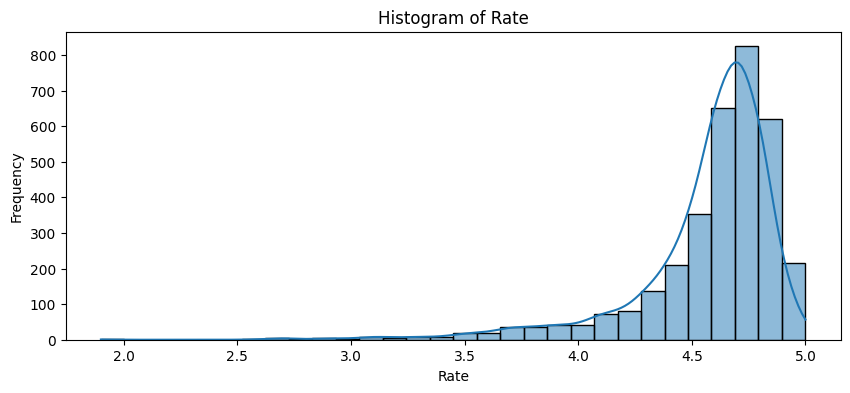

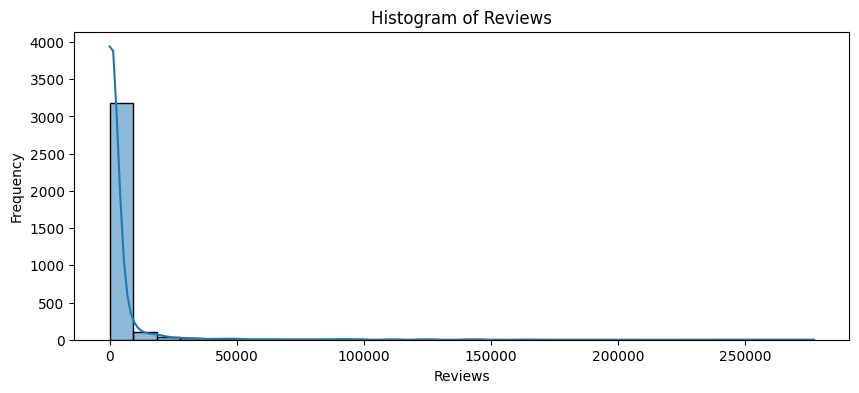

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = coursera.select_dtypes(include=['float64', 'int64']).columns

# Histogram for all numerical columns
plt.figure(figsize=(15, 8))

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(coursera[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [53]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [54]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [55]:
# Define updated categorical and numerical features
categorical_features = ['Subject', 'Title', 'Institution', 'Learning Product', 'Level', 'Duration',
    'Gained Skills'] 
numeric_features = ['Rate','Reviews']

# Print value counts for categorical features
for feature in categorical_features:
    print(f"Value counts for {feature}:\n{coursera[feature].value_counts()}\n")

Value counts for Subject:
Subject
Business                  973
Computer Science          925
Data Science              865
Information Technology    641
Name: count, dtype: int64

Value counts for Title:
Title
Business Analytics                                                       6
Data Visualization with Tableau                                          5
Bayesian Statistics                                                      4
Exploratory Data Analysis                                                4
Data Storytelling                                                        4
                                                                        ..
Inove na gestão de equipes e negócios: O crescimento da empresa          1
The Measure Phase for the 6 σ Black Belt                                 1
Engineering Project Management: Risk, Quality, Teams, and Procurement    1
AI Ethics in Business                                                    1
Predictive Modeling and Analytics      

### Correcting errors

-------------------

In [56]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## Machine Learning (kmeans)

In [57]:
import itertools
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# -------------------------
# Load and prepare the data
# -------------------------
# Assuming the dataset is named coursera
coursera_processed = coursera.drop(columns=['Title'])  # Drop non-relevant columns

# -------------------------
# Define candidate features
# -------------------------
candidate_features = [
    'Rate',           # Numerical
    'Reviews',        # Numerical
    'Level',          # Categorical
    'Subject',        # Categorical
    'Institution',    # Categorical
    'Duration'        # Categorical
]

numeric_features_set = {'Rate', 'Reviews'}
categorical_features_set = {'Level', 'Subject', 'Institution', 'Duration'}

# -------------------------
# Iterate over all feature combinations of size 4 or more,
# and evaluate clustering with k = 3 and k = 4.
# -------------------------
results = []  # To store each combination's performance

for r in range(4, len(candidate_features) + 1):
    for combo in itertools.combinations(candidate_features, r):
        features = list(combo)
        
        # Determine numeric and categorical columns for this combination
        numeric_cols = [feat for feat in features if feat in numeric_features_set]
        categorical_cols = [feat for feat in features if feat in categorical_features_set]
        
        # Build the preprocessor
        transformers = []
        if numeric_cols:
            transformers.append(('num', StandardScaler(), numeric_cols))
        if categorical_cols:
            transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols))
        preprocessor = ColumnTransformer(transformers)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
        
        try:
            X_preprocessed = pipeline.fit_transform(coursera_processed[features])
        except Exception as e:
            print(f"Error processing combination {features}: {e}")
            continue
        
        for k in [3, 4]:
            try:
                kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=20,
                                tol=1e-4, algorithm='elkan', random_state=0)
                cluster_labels = kmeans.fit_predict(X_preprocessed)
                score = silhouette_score(X_preprocessed, cluster_labels)
            except Exception as e:
                print(f"Error clustering with features {features} and k={k}: {e}")
                continue
            
            results.append({
                'features': features,
                'k': k,
                'silhouette_score': score
            })
            print(f"Features: {features} | k = {k} | Silhouette Score: {score:.4f}")

# -------------------------
# Identify the best feature combination based on silhouette score
# -------------------------
if results:
    best_result = max(results, key=lambda x: x['silhouette_score'])
    print("\nBest Feature Combination:")
    print("Features:", best_result['features'])
    print("k:", best_result['k'])
    print("Silhouette Score:", best_result['silhouette_score'])
else:
    print("No valid feature combinations found.")


Features: ['Rate', 'Reviews', 'Level', 'Subject'] | k = 3 | Silhouette Score: 0.3589
Features: ['Rate', 'Reviews', 'Level', 'Subject'] | k = 4 | Silhouette Score: 0.2535
Features: ['Rate', 'Reviews', 'Level', 'Institution'] | k = 3 | Silhouette Score: 0.3637
Features: ['Rate', 'Reviews', 'Level', 'Institution'] | k = 4 | Silhouette Score: 0.2009
Features: ['Rate', 'Reviews', 'Level', 'Duration'] | k = 3 | Silhouette Score: 0.4071
Features: ['Rate', 'Reviews', 'Level', 'Duration'] | k = 4 | Silhouette Score: 0.2635
Features: ['Rate', 'Reviews', 'Subject', 'Institution'] | k = 3 | Silhouette Score: 0.3523
Features: ['Rate', 'Reviews', 'Subject', 'Institution'] | k = 4 | Silhouette Score: 0.1563
Features: ['Rate', 'Reviews', 'Subject', 'Duration'] | k = 3 | Silhouette Score: 0.3514
Features: ['Rate', 'Reviews', 'Subject', 'Duration'] | k = 4 | Silhouette Score: 0.2271
Features: ['Rate', 'Reviews', 'Institution', 'Duration'] | k = 3 | Silhouette Score: 0.3581
Features: ['Rate', 'Reviews', 

Silhouette Score for k=3: 0.5110
Cluster  Cluster Name       
0        The Reliable Basics    2962
1        The Hidden Gems         389
2        The Crowd Favorites      50
Name: count, dtype: int64


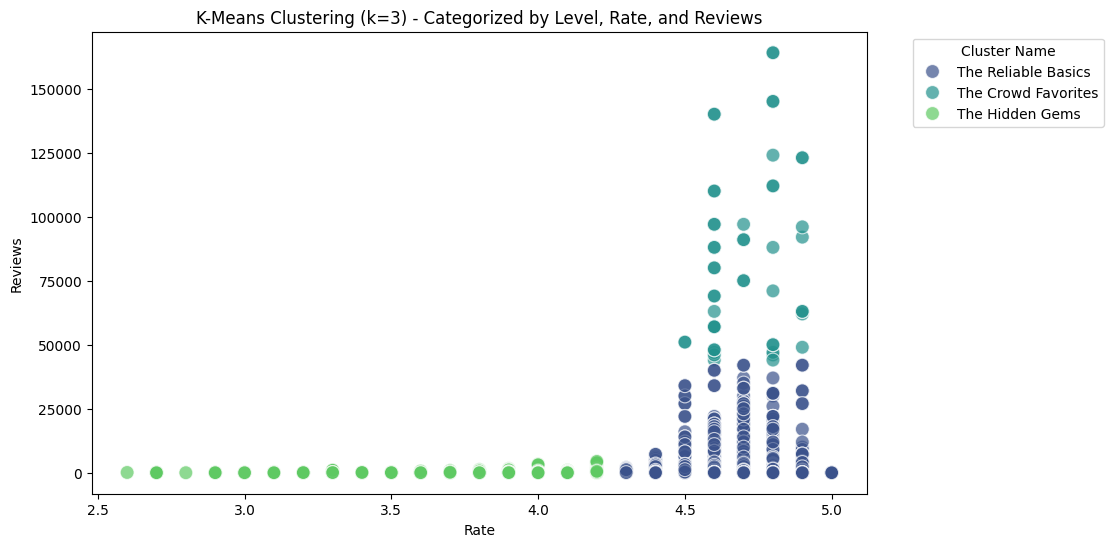


Cluster 0 Data:
   Rate  Reviews         Level  Cluster
0   4.4     6100      Beginner        0
1   4.6    11000  Intermediate        0
2   4.8    30000      Beginner        0
3   4.4     1800  Intermediate        0
4   4.8     4800         Mixed        0

Cluster 1 Data:
     Rate  Reviews         Level  Cluster
44    4.2      142      Beginner        1
59    4.2       28  Intermediate        1
68    4.1       11      Beginner        1
166   3.9     1000      Beginner        1
212   4.2     3800      Beginner        1

Cluster 2 Data:
     Rate  Reviews         Level  Cluster
30    4.8    46000      Beginner        2
63    4.8   124000      Beginner        2
72    4.9    92000  Intermediate        2
74    4.7    97000      Beginner        2
110   4.9    62000      Beginner        2


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Load and prepare the data
# -------------------------
coursera_processed = coursera[['Rate', 'Reviews', 'Level']].dropna()

# Filter data: Remove rows where Rate < 2.5 and Reviews > 200000
coursera_processed = coursera_processed[(coursera_processed['Rate'] >= 2.5) & (coursera_processed['Reviews'] <= 200000)]

# -------------------------
# Preprocessing pipeline
# -------------------------
numeric_cols = ['Rate', 'Reviews']
categorical_cols = ['Level']

# Define preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_preprocessed = pipeline.fit_transform(coursera_processed)

# -------------------------
# Apply K-Means Clustering with k=3 (for Level-based segmentation)
# -------------------------
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=20,
                tol=1e-4, algorithm='elkan', random_state=0)
coursera_processed['Cluster'] = kmeans.fit_predict(X_preprocessed)

# Compute silhouette score
silhouette = silhouette_score(X_preprocessed, coursera_processed['Cluster'])
print(f"Silhouette Score for k={k}: {silhouette:.4f}")

# -------------------------
# Assigning insightful cluster names based on hidden patterns
# -------------------------
cluster_mapping = {
    0: "The Reliable Basics",
    1: "The Hidden Gems",
    2: "The Crowd Favorites"
}
coursera_processed['Cluster Name'] = coursera_processed['Cluster'].map(cluster_mapping)


# Display cluster counts
print(coursera_processed[['Cluster', 'Cluster Name']].value_counts())

# -------------------------
# Visualizing Clusters by Level, Rate, and Reviews
# -------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coursera_processed['Rate'], y=coursera_processed['Reviews'],
                hue=coursera_processed['Cluster Name'], palette='viridis', s=100, alpha=0.7)
plt.title(f'K-Means Clustering (k={k}) - Categorized by Level, Rate, and Reviews')
plt.xlabel('Rate')
plt.ylabel('Reviews')
plt.legend(title='Cluster Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# -------------------------
# Display each cluster separately in a DataFrame
# -------------------------
coursera_processed = coursera_processed.drop(columns=['Cluster Name'], errors='ignore')
clusters = {}
for cluster_num in sorted(coursera_processed['Cluster'].unique()):
    clusters[f"Cluster {cluster_num}"] = coursera_processed[coursera_processed['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Data:")
    print(clusters[f"Cluster {cluster_num}"].head())  # Display first few rows of each cluster



In [59]:
# Cluster 0: "The Reliable Basics"
# Why?: These courses are consistent in quality (high ratings) and mostly target beginners. They’re the go-to courses for foundational learning, but they’re not necessarily the most popular or trending.

# Cluster 1: "The Hidden Gems"
# Why?: These courses are less popular (fewer reviews) and have lower ratings, but they cater to niche topics or specific audiences. They’re perfect for learners looking for something unique or off the beaten path.

# Cluster 2: "The Crowd Favorites"
# Why?: These courses are massively popular (huge review counts) and have high ratings. They’re the top picks for beginners and dominate the platform in terms of visibility and engagement.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Load and prepare the data
# -------------------------
# Assuming 'coursera' is your DataFrame; replace with actual data loading if needed
# coursera = pd.read_csv('your_coursera_data.csv')
coursera_processed = coursera[['Rate', 'Reviews', 'Level']].dropna()

# Filter data: Remove rows where Rate < 2.5 and Reviews > 200000
coursera_processed = coursera_processed[(coursera_processed['Rate'] >= 2.5) & (coursera_processed['Reviews'] <= 200000)]

# -------------------------
# Preprocessing pipeline
# -------------------------
numeric_cols = ['Rate', 'Reviews']
categorical_cols = ['Level']

# Define preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_preprocessed = pipeline.fit_transform(coursera_processed)

# -------------------------
# Apply K-Means Clustering with k=3
# -------------------------
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=20,
                tol=1e-4, algorithm='elkan', random_state=0)
coursera_processed['Cluster'] = kmeans.fit_predict(X_preprocessed)

# Compute silhouette score
silhouette = silhouette_score(X_preprocessed, coursera_processed['Cluster'])
print(f"Silhouette Score for k={k}: {silhouette:.4f}")

# -------------------------
# Exporting each cluster for analysis and providing insights
# -------------------------
for cluster_num in sorted(coursera_processed['Cluster'].unique()):
    cluster_df = coursera_processed[coursera_processed['Cluster'] == cluster_num]
    file_name = f"Cluster_{cluster_num}.csv"
    cluster_df.to_csv(file_name, index=False)
    print(f"\nCluster {cluster_num} saved as {file_name}. Size: {len(cluster_df)} records.")
    
    # Display sample data
    print(f"Cluster {cluster_num} Sample Data (First 5 Rows):")
    print(cluster_df.head())
    
    # Display summary statistics
    print(f"Cluster {cluster_num} Summary Statistics:")
    print(cluster_df.describe(include='all'))
    
    # Analyze Level distribution
    print(f"Cluster {cluster_num} Level Distribution:")
    print(cluster_df['Level'].value_counts())



